<a href="https://colab.research.google.com/github/joao363/TopiosAvancados/blob/master/Colab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introdução**

Seja bem vindo a primeira aula de Ciência de Dados. 

Abaixo você pode ver que podemos escrever código Python e mesclar com informações textuais.

In [1]:
print("João Luiz Goes Júnior")


João Luiz Goes Júnior


Nesta aula vamos trabalhar com informações sobre filmes, e para isto vamos utilizar os dados vindos do site Movie Lens. (Mais especificamente https://grouplens.org/datasets/movielens/)

Abaixo um exemplo de variável em Python.

In [2]:
nome_do_filme = "A volta dos que não foram"

Na linha acima, criamos uma variável, e podemos utilizá-la abaixo.

In [3]:
print(nome_do_filme)

A volta dos que não foram


In [4]:
nome_do_filme

'A volta dos que não foram'

**Lendo os dados do MovieLens**

Primeiramente, baixamos as informações do site (https://grouplens.org/datasets/movielens/) e em seguida adicionamos os arquivos no GitHub.

Com os dados salvos no GitHub, utilizamos a biblioteca Pandas para importá-los para nossa aplicação.

In [5]:
import pandas as pd

A função `read_csv` faz o processo de baixar o arquivo e importar os dados para um `DataFrame`.

In [6]:
filmes = pd.read_csv("https://raw.githubusercontent.com/joao363/TopiosAvancados/master/ml-latest-small/movies.csv")

# Ver o tipo de dado
type(filmes)

pandas.core.frame.DataFrame

Como estamos utilizando um dataset em inglês, podemos alterar os nomes das colunas do nosso dataset para português.

Também utilizamos a função `head` que serve para mostrar apenas os primeiros elementos do nosso dataset.

In [7]:
# Alterar nomes das colunas
filmes.columns = ["filmeId", "titulo", "generos"]
# Mostra os 5 primeiros itens
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


De forma similar ao `head`, a função `tail` mostra apenas os últimos elementos do nosso dataset. Note que podemos passar um número que indica a quantidade de elementos a serem mostrados.

In [8]:
# Mostra os 10 últimos itens
filmes.tail(10)

,filmeId,titulo,generos
9732,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi
9733,193567,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama
9734,193571,Silver Spoon (2014),Comedy|Drama
9735,193573,Love Live! The School Idol Movie (2015),Animation
9736,193579,Jon Stewart Has Left the Building (2015),Documentary
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


Utilizando o ponto de interrogação `?` na frente de uma variável ou função, podemos ler a documentação da mesma dentro da ferramenta Colab.

In [9]:
# lendo a documentação de um método/atributo
?filmes.head

In [10]:
# lendo a documentação do tipo
?filmes

**Lendo informações das avaliações**

Após trabalharmos um pouco com os dados básicos dos filmes, chegou a hora de baixar as avaliações dados pelos usuários para cada filme.

Note que neste dataset, apenas informações numéricas estão presentes. Logo mais juntaremos os dois datasets (filmes e avaliações) em uma única variável.

In [11]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/joao363/TopiosAvancados/master/ml-latest-small/ratings.csv")
avaliacoes

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Mas antes, vamos consultar algumas informações a respeito destes dados.

É possível verificar o formato do nosso dataset a partir do atributo `shape`, conforme abaixo.

In [12]:
# Os dados das avaliações estão organizados em 100836 linhas e 4 colunas
avaliacoes.shape

(100836, 4)

Você pode notar que o atributo `shape` retornou o número de linhas e o número de colunas do nosso dataset.

Podemos obter informação similar utilizando a nossa conhecida função `len`, que apresenta o total de linhas disponível neste dataset.

In [13]:
len(avaliacoes)

100836

Novamente vamos alterar os nomes das colunas (agora das avaliações) para português, para ficar mais fácil nossa interpretação.

In [14]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Já visualizamos várias informações do nosso dataset, não é?

Podemos aplicar um filtro neste dataset de avaliações, para visualizar as informações referentes a um único filme. Para isto, utilizamos a função `query`, passando como parâmetro a informação que queremos filtrar.

In [15]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId == 1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Podemos também obter várias informações estatísticas da nossa base dados através da função `describe`. Ela nos traz as informações de contagem, média, mediana, desvio padrão, valor mínimo e máximo, etc.

In [16]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


Se quisermos, também é possível consultar apenas uma informação estatística por vez, conforme vemos a chamada da função `mean` abaixo, que traz a média das informações de um filme.

In [17]:
avaliacoes_do_filme_1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

Como vimos, a média de todas as informações de um filme não faz muito sentido. O que queremos mesmo é saber a média das notas de um determinado filme. Para isto, vamos fazer a média apenas da coluna de notas.

In [18]:
avaliacoes_do_filme_1["nota"].head()

0       4.0
516     4.0
874     4.5
1434    2.5
1667    4.5
Name: nota, dtype: float64

Aqui é onde se calcula a média das notas do filme 1.

In [19]:
avaliacoes_do_filme_1["nota"].mean()

3.9209302325581397

Poderiamos também querer visualizar as médias das notas de todos os filmes do nosso dataset.

In [20]:
avaliacoes["nota"].mean()

3.501556983616962

Ou também, poderiamos querer visualizar as médias de cada filme separadamente. 

Ao invés de criar uma variável para cada filme, como fizemos acima, podemos utilizar a função `groupby`, que tem por objetivo agrupar informações iguais a partir de uma determinada coluna. Vejamos o exemplo abaixo.

In [21]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

**Juntar as informações de dois datasets**

Também é possível juntar as informações de dois datasets.

Para isto, utilizamos a função `join`, passando qual informação queremos juntar, e qual é a coluna que deve ser utilizada como referência. Veja o exemplo abaixo.

In [22]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


As vezes é interessante ordenar as informações para uma melhor visualização. 

Para ordenar os dados, utilizamos a função `sort_values`, e passamos a coluna que queremos ordenar. O parâmetro `ascending` indica se é para ordenar de forma crescente ou decrescente.

In [23]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


**Melhorando a apresentação das informações utilizando gráficos**

Já fizemos algumas avaliações interessantes, porém mostramos estas informações apenas em forma de texto.

Seria interessante aprendermos a plotar gráficos também.

A própria biblioteca `Pandas` possui diversmos mecanismos para apresentação de gráficos, de forma bem facilitada.

Vamos criar um gráfico bem simples como exemplo usando a função `plot`.

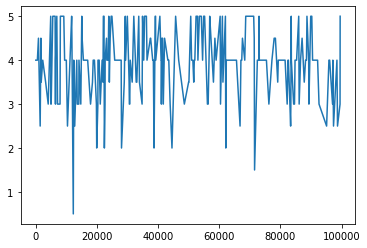

In [24]:
# Este gráfico não faz muito sentido com os nossos dados.
avaliacoes_do_filme_1["nota"].plot()

Vejam que interessante. Com uma linha de código fomos capazes de desenhar um gráfico a partir das informações do nosso dataset. Porém, o gráfico escolhido não parece ser o mais adequado, não é?

Vamos alterar o tipo de gráfico para visualizar melhor as informações. Para alterar o tipo de gráfico, podemos utilizar a opção `kind`, e passar o tipo do gráfico que queremos. Neste caso utilizamos o tipo de gráfico 'histograma'. Veja também que podemos utilizar a opção `title` para personalizar nosso gráfico.

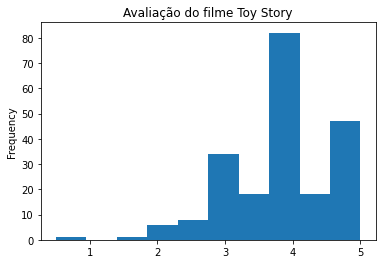

In [25]:
avaliacoes_do_filme_1["nota"].plot(kind='hist', title='Avaliação do filme Toy Story')

O Python possui bibliotecas muito ricas para manipulação de gráficos. Uma delas é a `matplotlib`. Podemos utilizá-la para personalizar um pouco mais nosso gráfico.

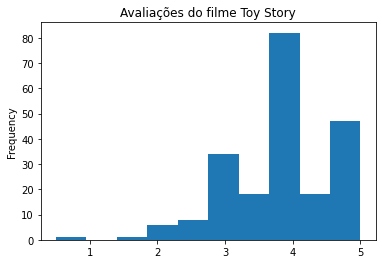

In [26]:
import matplotlib.pyplot as plt

avaliacoes_do_filme_1["nota"].plot(kind='hist')

plt.title("Avaliações do filme Toy Story")
plt.show()

Vamos plotar mais alguns gráficos agora para outros filmes. Vejam que estamos utilizando uma abordagem 'inline', onde aplicamos um filtro com a função `query`, pegamos apenas a coluna de "nota" e por fim plotamos um gráfico tipo 'histograma' utilizando a função `plot`.

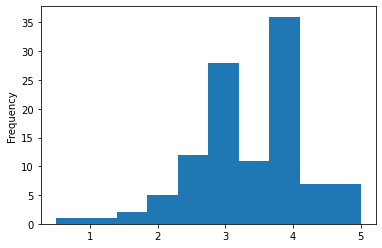

In [27]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist')

Apenas mais um exemplo de gráfico de um filme com apenas uma nota. Este gráfico não parece muito interessante, não é?

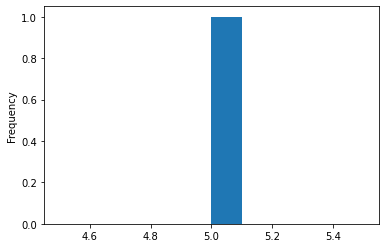

In [28]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist')

Chegou a hora de você praticar e aprender mais algumas coisas por conta própria. Para isto, temos que resolver os seguintes desafios.

**Desafio 1**
Existem 18 filmes sem avaliação. Determine se são mesmo 18 filmes, e qual o nome deles.

In [29]:
avaliacoes

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


**Desafio 2**
Alterar a coluna "nota" para "media".

In [30]:
filmes_com_media.columns = ["filmeId" , "Titulo" , " Generos" , " Media"]
filmes_com_media.head()

,filmeId,Titulo,Generos,Media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [31]:
filmes_com_media.head()

,filmeId,Titulo,Generos,Media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


**Desafio 3**
Colocar o número de avaliações por filme, não só a média, mas o TOTAL de votos por filme.

**Desafio 4**
Arredondar as médias (coluna de nota média) para duas casas decimais.